# Анализ авиакомпаний

В этом проекте вы представите, что работаете в туристическом агентстве и вам нужно знать все тонкости цен на авиабилеты для своих клиентов. Вы хотите убедиться, что можете найти лучшее предложение для своего клиента и помочь ему понять, как цены на авиабилеты меняются в зависимости от различных факторов.

Вы решили изучить вашу любимую авиакомпанию. Данные о которой включают информацию о:
- miles - мили, пройденные за время полета
- passengers - кол-во пассажиров на рейсе
- delay - задержка взлета в минутах
- inflight_meal - включено ли питание в стоимость полета
- inflight_entertainment - предусмотрены ли бесплатные развлекательные системы для каждого места
- inflight_wifi - есть ли бесплатный Wi-Fi на борту самолета
- day_of_week - день недели полета
- weekend - этот полет был совершен в выходные дни
- coach_price - средняя цена билета на автобус
- firstclass_price - средняя цена, уплачиваемая за места первого класса
- hours - сколько часов длился полет
- redeye - этот рейс был ночным

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# загрузим данные для проекта
flight = pd.read_csv('../files/flight.csv')

# отобразим пару строк данных
print(flight.head())

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


Ответте на вопросы
- Как выглядят цены на билеты?
- Каковые высокие и низкие значения?
- Что будет считать средним значением?
- Кажется ли вам, что 500 долларов - это хорошая цена за билет?

376.58525308213905
380.56


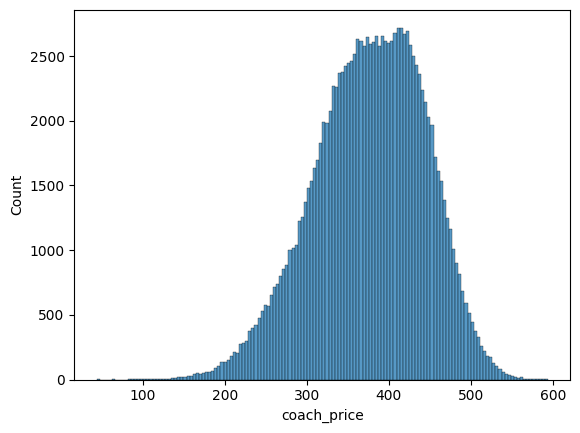

<Figure size 640x480 with 0 Axes>

In [8]:
print(np.mean(flight.coach_price))
print(np.median(flight.coach_price))

sns.histplot(flight.coach_price)
plt.show()
plt.clf()

431.834377372817
437.115


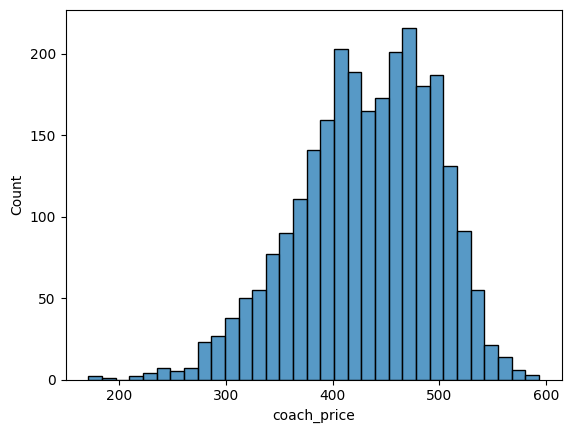

<Figure size 640x480 with 0 Axes>

In [9]:
print(np.mean(flight.coach_price[flight.hours == 8]))
print(np.median(flight.coach_price[flight.hours == 8]))

sns.histplot(flight.coach_price[flight.hours == 8])
 
plt.show()
plt.clf()

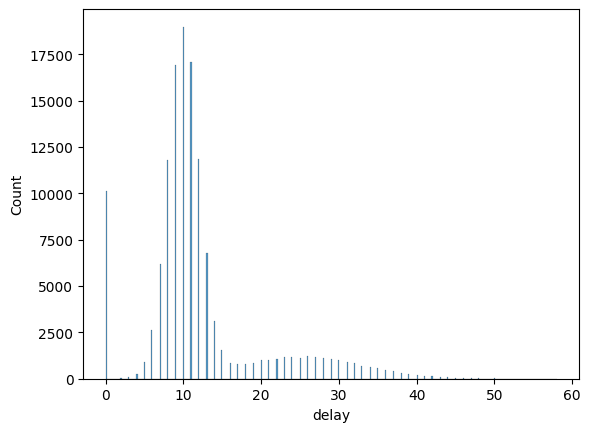

<Figure size 640x480 with 0 Axes>

In [10]:
sns.histplot(flight.delay[flight.delay <=500])
plt.show()
plt.clf()

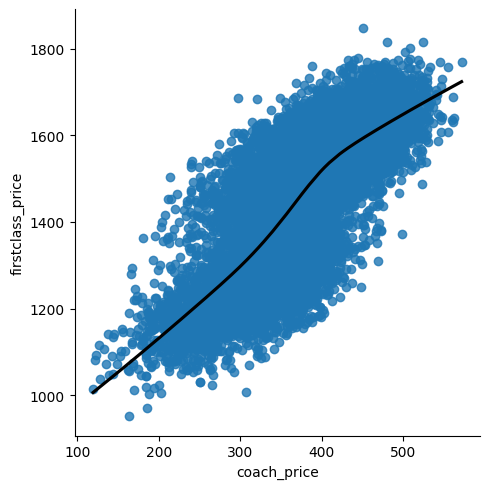

<Figure size 640x480 with 0 Axes>

In [12]:
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

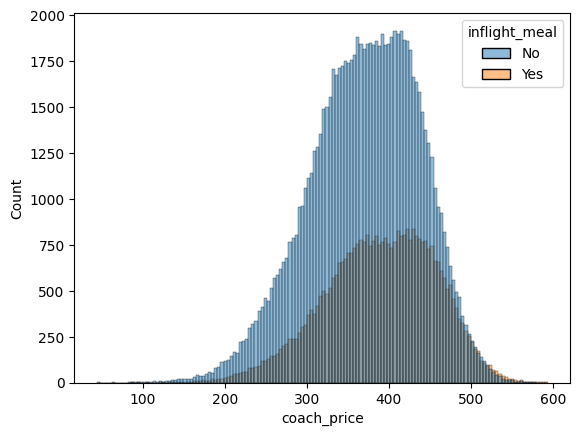

<Figure size 640x480 with 0 Axes>

In [13]:
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal)
plt.show()
plt.clf()

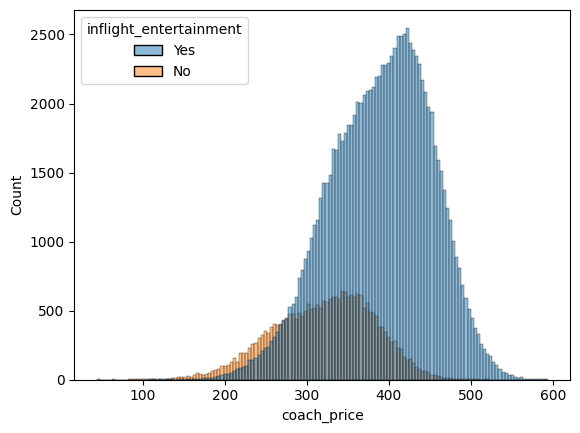

<Figure size 640x480 with 0 Axes>

In [14]:
sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment)
plt.show()
plt.clf()

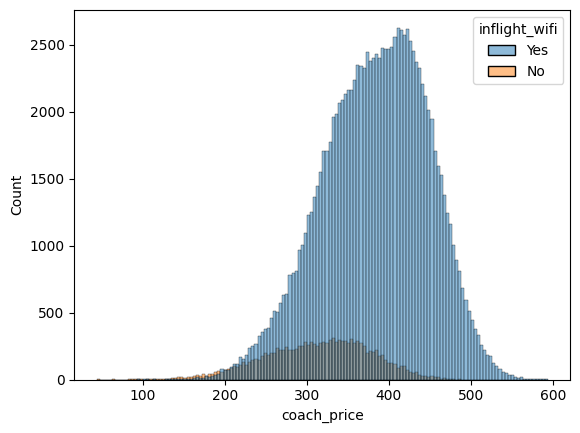

<Figure size 640x480 with 0 Axes>

In [15]:
sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi)
plt.show()
plt.clf()

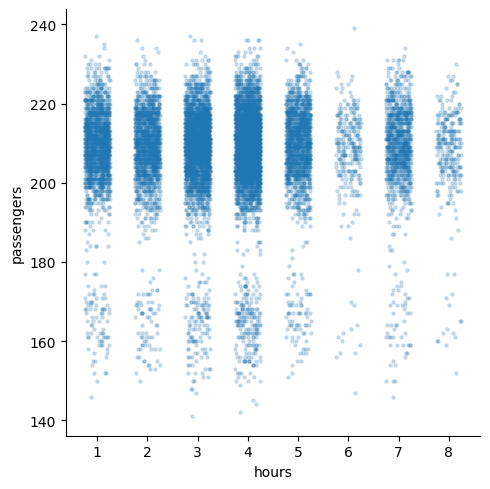

<Figure size 640x480 with 0 Axes>

In [16]:
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()

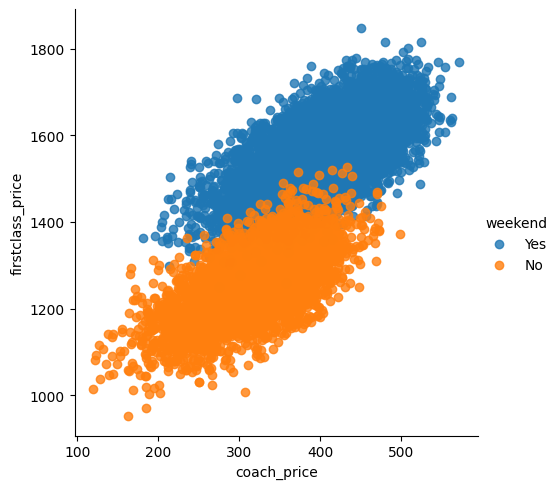

<Figure size 640x480 with 0 Axes>

In [17]:
sns.lmplot(x ='coach_price', y='firstclass_price', hue = 'weekend', data = flight_sub, fit_reg= False)
plt.show()
plt.clf()

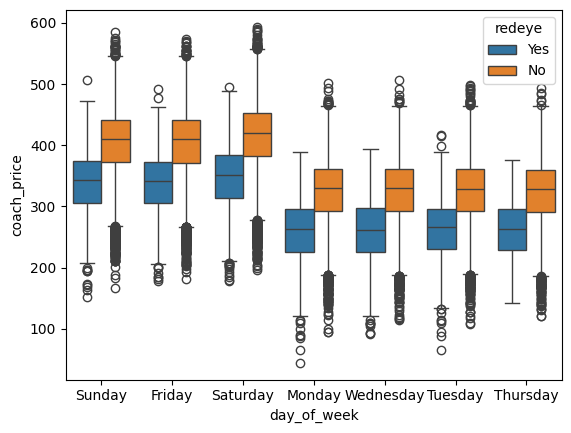

<Figure size 640x480 with 0 Axes>

In [18]:
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight)
plt.show()
plt.clf()